# Analysis Notebook 2- Iris Shang

Living in Berkeley, I’ve noticed that the area enjoys abundant sunshine (especially when I moved from the Mid-West), making it ideal for harnessing solar energy. With California's high electricity costs, solar power presents a sustainable way to reduce reliance on the grid and achieve significant savings. To fully benefit from solar energy, it's essential to understand when and how much solar energy is available, ensuring that solar panels are used effectively.

As global concerns about climate change grow, Berkeley is under pressure to adopt more sustainable energy practices. Solar power is one of the cleanest energy sources, producing no greenhouse gases during electricity generation. By studying how best to harness solar energy in Berkeley, we can contribute to the broader effort to transition to renewable energy. Optimizing solar panel setup and usage based on factors like cloud cover, pecipiation,radiation,wind speed, and seasonal changes ensures efficient energy production, further reducing reliance on non-renewable sources.

Therefore, I was interested in Solar Energy as a saving solution in Berkeley. Ihave two hypothese and one question regarding the data.
Hypotheses:
- 1. Solar Panel is a good investment for Berkeley Household.
- 2. Solar Energy resources are more abundant in summer months than winter months in Berkeley.

Explore the key factors:
- What are the most important factors that contributes to solar irradience?

Source: 
The datasets I use for this analysis notebook are sourced from NASA’s Prediction Of Worldwide Energy Resources (POWER) project (https://power.larc.nasa.gov/), which provides climate data parameters across different geographic locations. These datasets are accessible through API queries, making them a rich and structured source of data. The dataset is not merely a static file but is dynamically retrieved based on specific queries, allowing for customized data extraction tailored to the research needs.

LLM transcripts: https://chatgpt.com/share/4e1ebb96-6fc5-43e9-be7e-ecc74b9b8ecc

## Selecting Parameters for Studying Berkeley Solar Energy (Daily)

- Parameters are selected from: https://power.larc.nasa.gov/#resources
- For the analysis notebook, I want to select parameters that are relevant to Solar Energy/Radiance potential from January 1st, 2023 to December 31st, 2023 to achieve a year-round analysis solar energey in Berkeley. To effectively study solar energy potential in Berkeley, the following 9 key parameters have been selected from the wide variety of environmental parameters.
### **Atmospheric and Irradiance Parameters:**

1. **Top-Of-Atmosphere Shortwave Direct Normal Radiation (TOA_SW_DNI)**
   -  Measures solar radiation at the top of the atmosphere, providing a *(theoretical) upper boundary for solar energy potential*.
   -  Essential for optimizing systems like solar concentrators that rely on direct sunlight.

2. **All Sky Surface Shortwave Downward Irradiance (ALLSKY_SFC_SW_DWN)**
   - Measures total solar energy received on a horizontal surface (AKA. *the actual amount of solar energy received, which is also the target variable*), including both direct and diffuse radiation.

3. **Clear Sky Surface Shortwave Downward Irradiance (CLRSKY_SFC_SW_DWN)**
   - Measures solar energy received without cloud interference, providing a *baseline for maximum potential under ideal conditions*.

### **Environmental Conditions:**

4. **Cloud Amount (CLOUD_AMT)**
   - Average percentage of sky covered by clouds.
   - Important for understanding how cloud cover affects solar radiation reaching the surface.

5. **Precipitable Water (PRECTOTCORR)**
   - Bias-corrected total precipitation (including snow).
   - High precipitation often reduces solar irradiance and requires more frequent panel maintenance, impacting solar energy efficiency.

### **Ground and Surface Conditions:**

6. **Surface Albedo (ALLSKY_SRF_ALB)**
   - Reflectivity of the Earth’s surface, influencing how much solar energy is absorbed versus reflected.
   - Higher albedo means more reflection and less absorption, which affects the efficiency of solar energy collection.

### **Operational Parameters:**

7. **Temperature at 2 Meters (T2M)**
   - Average air temperature at 2 meters above the surface.
   - Higher temperatures decrease solar panel efficiency and can lead to long-term degradation of panels.

8. **Relative Humidity at 2 Meters (RH2M)**
   - Measures moisture in the air.
   - High humidity scatters and absorbs solar radiation, reduces efficiency, and can cause condensation on panels.

9. **Wind Speed at 10 Meters (WS10M)**
   - Wind can cool solar panels, improving efficiency, but high wind speeds can also cause mechanical stress and potential damage.
   - Understanding wind conditions is crucial for the design and durability of solar energy systems.

# 1. Importing and Cleaning the Data

In [30]:
# Import necessary libraries
import requests
import json
import seaborn as sns
import pandas as pd
import wget
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import warnings
warnings.filterwarnings('ignore')

To get the information for Berkeley, we need to know the latitude and longitude to select the geographic location from this API, as well as the dates which I want to acquire data from:

- **Start time:** 20230101
- **End time:** 20231231
- **Latitude:** 37.8715
- **Longitude:** -122.2730



In [32]:
# Define the request URL
url = "https://power.larc.nasa.gov/api/temporal/daily/point?start=20230101&end=20231231&latitude=37.8715&longitude=-122.2730&community=re&parameters=TOA_SW_DNI%2CALLSKY_SFC_SW_DWN%2CCLRSKY_SFC_SW_DWN%2CCLOUD_AMT%2CPRECTOTCORR%2CALLSKY_SRF_ALB%2CT2M%2CRH2M%2CWS10M&format=json&user=Iris&header=true&time-standard=utc"

# Make the request and get the response
response = requests.get(url)

# Parse the JSON data
data = response.json()

In [33]:
# Extract the daily data
daily_solar_data = data['properties']['parameter']
    
# Convert the data into a DataFrame
df = pd.DataFrame(daily_solar_data)

# Convert the index to datetime format
df.index = pd.to_datetime(df.index, format='%Y%m%d')

df

,TOA_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,CLOUD_AMT,PRECTOTCORR,ALLSKY_SRF_ALB,T2M,RH2M,WS10M
2023-01-01,14.08,3.08,3.07,31.02,1.43,0.10,10.39,78.44,6.16
2023-01-02,14.08,0.65,2.86,88.77,8.19,0.07,8.87,80.69,3.19
2023-01-03,14.08,1.65,2.91,77.96,5.21,0.08,8.23,92.69,3.97
2023-01-04,14.09,0.82,2.79,99.52,13.27,0.07,9.98,91.12,6.83
2023-01-05,14.09,1.16,2.92,85.22,39.46,0.08,12.49,89.12,7.98
...,...,...,...,...,...,...,...,...,...
2023-12-27,14.09,0.92,2.71,99.71,5.71,0.08,11.62,94.38,4.49
2023-12-28,14.09,1.48,2.73,78.30,4.67,0.09,13.13,94.38,2.64
2023-12-29,14.09,1.20,2.74,92.67,7.19,0.09,14.23,93.25,4.34
2023-12-30,14.09,2.44,2.89,63.35,21.63,0.10,12.53,90.81,3.20


## Summary of the dataset

In [34]:
# Summary statistics for the dataset
summary_stats = df.describe()
print(summary_stats)

       TOA_SW_DNI  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN   CLOUD_AMT  \
count  365.000000         365.000000         365.000000  365.000000   
mean    16.852658           4.696192           5.945288   53.987041   
std      2.073813           1.867998           2.058999   26.659445   
min     13.840000           0.610000           2.660000    1.300000   
25%     15.210000           3.290000           3.920000   34.950000   
50%     16.550000           4.860000           6.050000   54.600000   
75%     18.650000           6.130000           7.910000   75.670000   
max     19.870000           8.990000           9.030000   99.710000   

       PRECTOTCORR  ALLSKY_SRF_ALB         T2M        RH2M       WS10M  
count   365.000000      365.000000  365.000000  365.000000  365.000000  
mean      1.981397        0.114192   13.498822   79.089753    3.668603  
std       5.757196        0.017040    3.814337    8.903713    1.178381  
min       0.000000        0.070000    5.050000   45.060000    1.1700

From the summary table, we see some extreme maximum/minimum values, so we should consider checking for the outliers values.

## Outliers? 
 It's important to detect outliers as extreme whether in some days will have a huge impact on the model for predicting Solar Energy.
 - Usually we use +-1.5*IQR to decide what are the outliers, but this means removing 95 out of 365 days in a year (26%) in this case, which is not ideal for model training (if there's one outlier in any of the 9 parameters, the full row of date will be removed).
 - Thereofre, i decide to identify only the most extreme outliers (±3SD), minimizing the chance of flagging data points that are just slightly unusual, resulting in removing 20 days with outlier values in the parameters. 

In [43]:
# Function to detect outliers using the IQR method
def detect_iqr_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the dataset using IQR method
iqr_outliers = detect_iqr_outliers(df)

# Define and populate outlier_dates
outlier_dates = set()
for key, value in iqr_outliers.items():
    if not value.empty:
        outlier_dates.update(value.index)

# The number of days with outliers
num_outlier_days = len(outlier_dates)
print(f"Number of unique days with IQR outliers: {num_outlier_days}")

Number of unique days with IQR outliers: 95


In [35]:
# Function to detect outliers that are beyond ±3 standard deviations from the mean
def detect_sd_outliers(df):
    outliers = {}
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the dataset
sd_outliers = detect_sd_outliers(df)

# Step to define and populate outlier_dates
outlier_dates = set()
for key, value in sd_outliers.items():
    if not value.empty:
        outlier_dates.update(value.index)

# The number of days with outliers
num_outlier_days = len(outlier_dates)
print(f"Number of unique days with ±3 SD outliers: {num_outlier_days}")

# Display outliers for each parameter
for key, value in sd_outliers.items():
    if not value.empty:
        print(f"Outliers detected in {key} (±3 SD):")
        print(value)

Number of unique days with ±3 SD outliers: 20
Outliers detected in PRECTOTCORR (±3 SD):
            TOA_SW_DNI  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  CLOUD_AMT  \
2023-01-05       14.09               1.16               2.92      85.22   
2023-01-09       14.08               1.73               3.02      99.04   
2023-01-14       14.07               1.38               3.10      99.24   
2023-01-16       14.06               2.03               3.23      91.50   
2023-02-24       15.29               3.83               4.99      81.24   
2023-03-10       16.58               3.05               5.38      93.68   
2023-03-14       16.54               2.27               5.55      97.83   
2023-03-21       16.47               2.42               6.17      96.23   
2023-12-18       14.07               0.86               2.68      89.44   
2023-12-30       14.09               2.44               2.89      63.35   

            PRECTOTCORR  ALLSKY_SRF_ALB    T2M   RH2M  WS10M  
2023-01-05        39.46

## New Corrected Data of Year 2023

After dropping the outliers, here's the new data for 345 days in 2023 for Berkeley.

In [36]:
# Drop the outlier dates from the original DataFrame
corrected_df = df.drop(outlier_dates)

# The new DataFrame without outliers
corrected_df

,TOA_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,CLOUD_AMT,PRECTOTCORR,ALLSKY_SRF_ALB,T2M,RH2M,WS10M
2023-01-01,14.08,3.08,3.07,31.02,1.43,0.10,10.39,78.44,6.16
2023-01-02,14.08,0.65,2.86,88.77,8.19,0.07,8.87,80.69,3.19
2023-01-03,14.08,1.65,2.91,77.96,5.21,0.08,8.23,92.69,3.97
2023-01-04,14.09,0.82,2.79,99.52,13.27,0.07,9.98,91.12,6.83
2023-01-06,14.09,1.80,2.95,78.43,0.82,0.08,10.69,89.56,3.88
...,...,...,...,...,...,...,...,...,...
2023-12-26,14.08,1.68,2.75,96.81,0.01,0.08,10.47,91.44,2.16
2023-12-27,14.09,0.92,2.71,99.71,5.71,0.08,11.62,94.38,4.49
2023-12-28,14.09,1.48,2.73,78.30,4.67,0.09,13.13,94.38,2.64
2023-12-29,14.09,1.20,2.74,92.67,7.19,0.09,14.23,93.25,4.34


# 2. Exploratory Data Analysis

## Density Plot of the Parameters

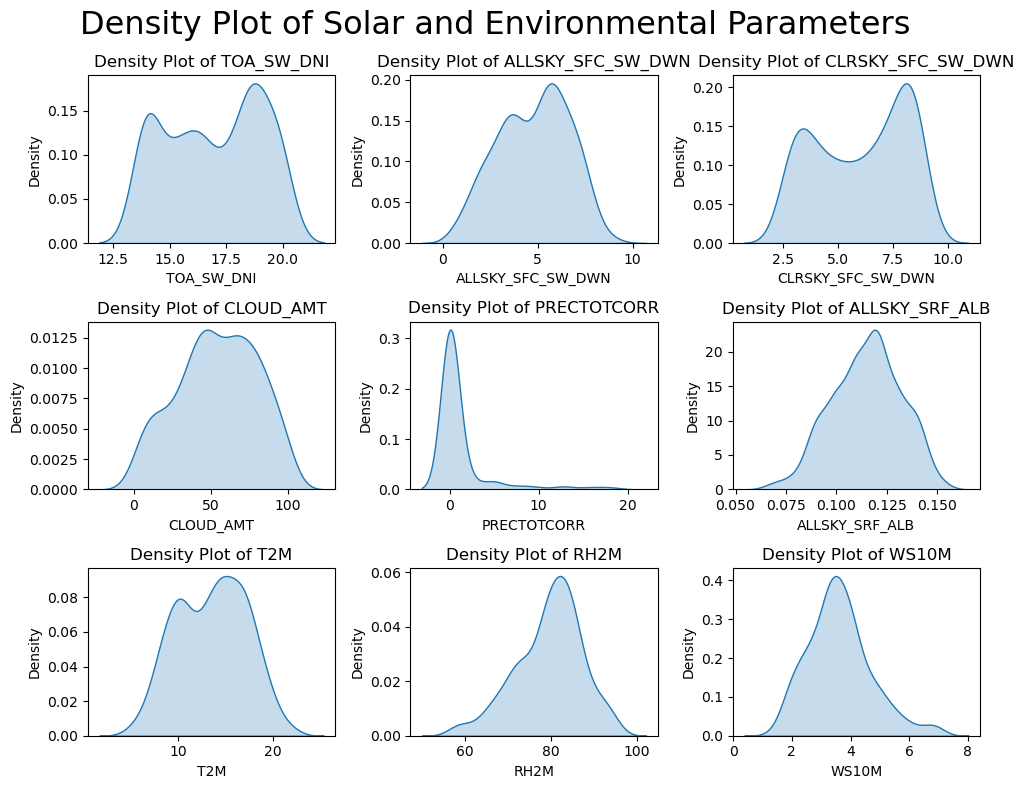

In [37]:
# Plot density plots for each parameter
plt.figure(figsize=(10,8))
for i, column in enumerate(corrected_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(corrected_df[column], shade=True)
    plt.title(f'Density Plot of {column}')
plt.suptitle('Density Plot of Solar and Environmental Parameters', size = 23)
plt.tight_layout()
plt.show()

- **TOA_SW_DNI:** Shows a bimodal distribution, indicating variability in solar radiation at the top of the atmosphere.
- **ALLSKY_SFC_SW_DWN:** Also bimodal, reflecting different levels of solar radiation reaching the Earth's surface.
- **CLRSKY_SFC_SW_DWN:** Bimodal distribution suggests varying clear sky solar radiation, likely due to seasonal effects.
- **CLOUD_AMT:** Displays a peak around 60%, indicating moderate cloud cover is most common.
- **PRECTOTCORR:** Right-skewed, with most days experiencing little to no precipitation.
- **ALLSKY_SRF_ALB:** Unimodal distribution with a peak at 0.125, indicating consistent surface reflectivity.
- **T2M:** Bimodal distribution, suggesting typical temperature ranges at different times of the year.
- **RH2M:** Bimodal with peaks around 75% and 85%, reflecting common humidity levels.
- **WS10M:** Right-skewed distribution with most wind speeds clustering around 2-3 m/s.

## Time Series Plot (of each month) for the Parameters
 Time Series (Trend) Analysis: Plot each parameter over time to identify trends or seasonal patterns. 

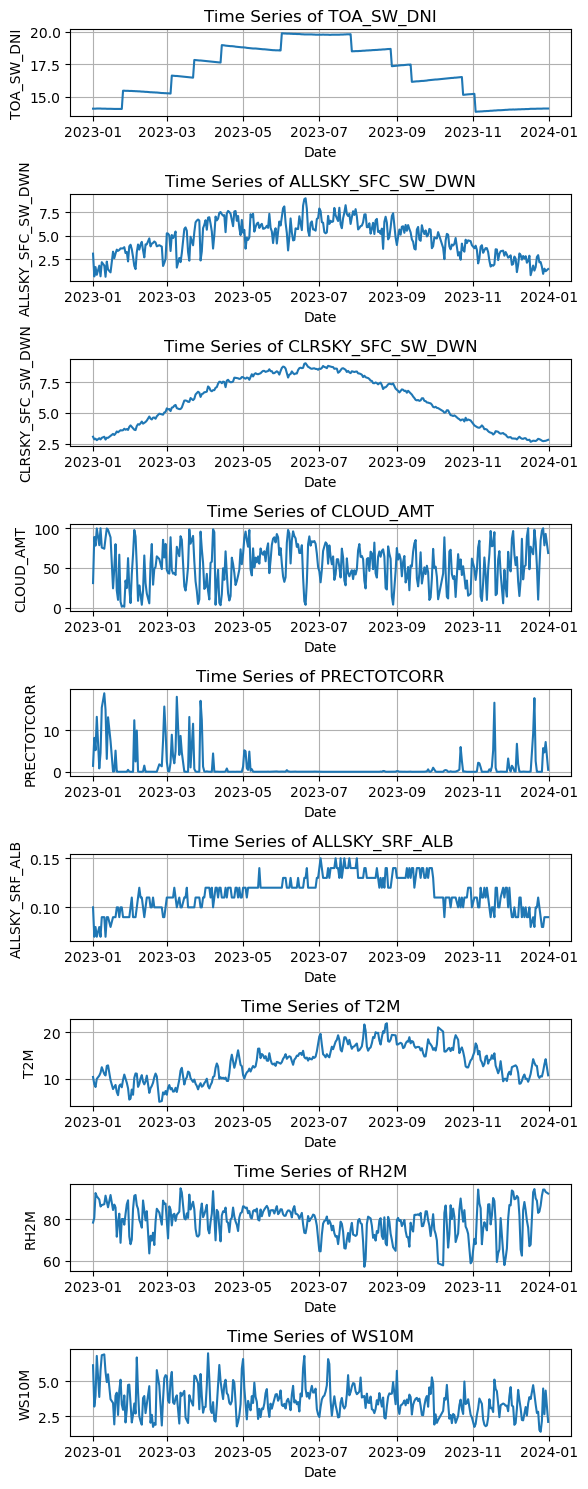

In [38]:
# Plot each parameter over time
plt.figure(figsize=(6, 15))

for i, column in enumerate(corrected_df.columns, 1):
    plt.subplot(len(corrected_df.columns), 1, i)
    plt.plot(corrected_df.index, corrected_df[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Monthly Average and Trend Plot

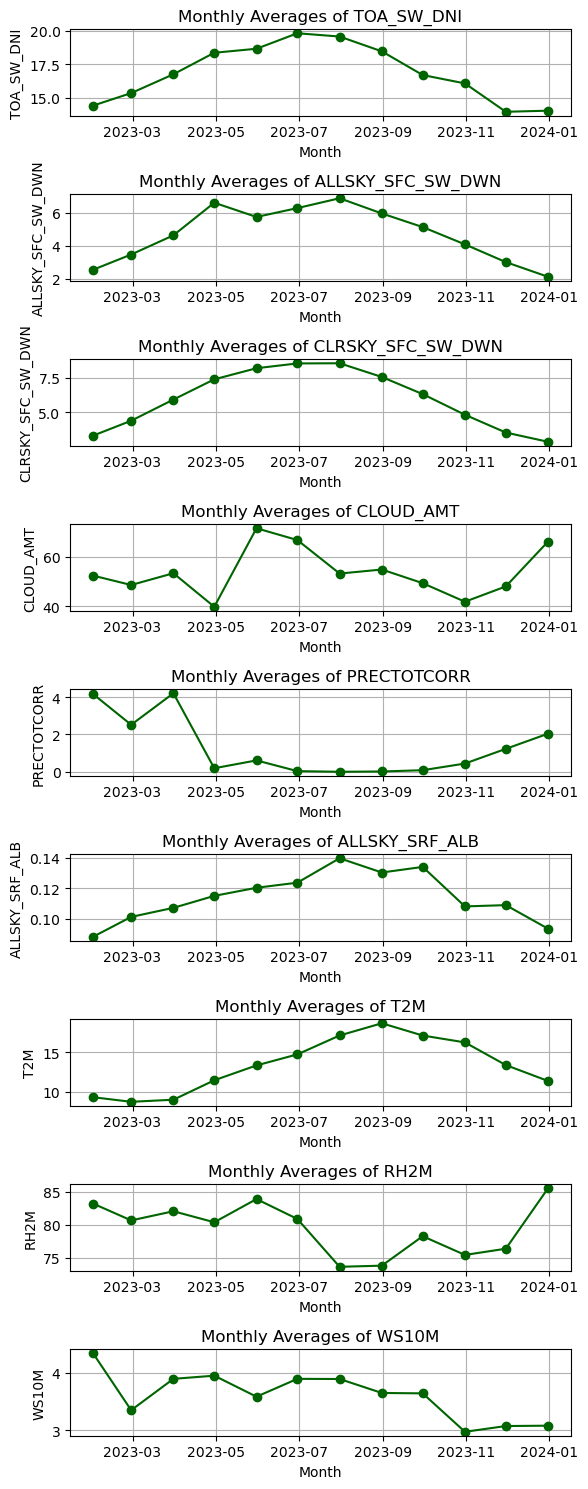

In [66]:
# Group by month and calculate the mean for each month
monthly_averages = corrected_df.resample('M').mean()

# Plot each parameter's monthly average
plt.figure(figsize=(6, 15))

for i, column in enumerate(monthly_averages.columns, 1):
    plt.subplot(len(monthly_averages.columns), 1, i)
    plt.plot(monthly_averages.index, monthly_averages[column], marker='o', color='darkgreen', linestyle='-', label=column)
    plt.title(f'Monthly Averages of {column}')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

##### Summary:
- The parameters related to solar radiation (TOA_SW_DNI, ALLSKY_SFC_SW_DWN, CLRSKY_SFC_SW_DWN) all exhibit strong seasonal patterns, with peaks in the summer months (around July) and lower values in the winter months. This is consistent with the Earth's tilt and the amount of sunlight received during different times of the year.

- Temperature peaks in the summer, while relative humidity tends to be higher in the cooler months. This is typical of many climates where warm air holds more moisture but also leads to lower relative humidity.

- Surface albedo follows a similar seasonal trend as solar radiation, reflecting more sunlight during summer.

- Both cloud cover and precipitation are lower in summer and higher in winter, influencing the amount of solar radiation reaching the surface and corresponds to higher solar radiation in summer. (From this, we can also tell that it's more likely to rain in winter in Berkeley!)

- Wind speed, however, does not show a strong seasonal pattern and fluctuates more irregularly.


# 3. Statistical Analysis

## Correlation Matrix and Heatmap
(I tried to debug the reason why the heatmap only shows r value for the first parameter, but I didn't figure out the reason--the correlation matrix looks just fine, so I'm not sure about this specific problem here.)

                   TOA_SW_DNI  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  \
TOA_SW_DNI           1.000000           0.819775           0.972126   
ALLSKY_SFC_SW_DWN    0.819775           1.000000           0.855880   
CLRSKY_SFC_SW_DWN    0.972126           0.855880           1.000000   
CLOUD_AMT            0.054086          -0.389786           0.031032   
PRECTOTCORR         -0.281924          -0.454681          -0.301916   
ALLSKY_SRF_ALB       0.693282           0.785004           0.754036   
T2M                  0.423790           0.403656           0.427853   
RH2M                -0.119180          -0.377729          -0.139711   
WS10M                0.072451          -0.001604           0.088828   

                   CLOUD_AMT  PRECTOTCORR  ALLSKY_SRF_ALB       T2M      RH2M  \
TOA_SW_DNI          0.054086    -0.281924        0.693282  0.423790 -0.119180   
ALLSKY_SFC_SW_DWN  -0.389786    -0.454681        0.785004  0.403656 -0.377729   
CLRSKY_SFC_SW_DWN   0.031032    -0.301916     

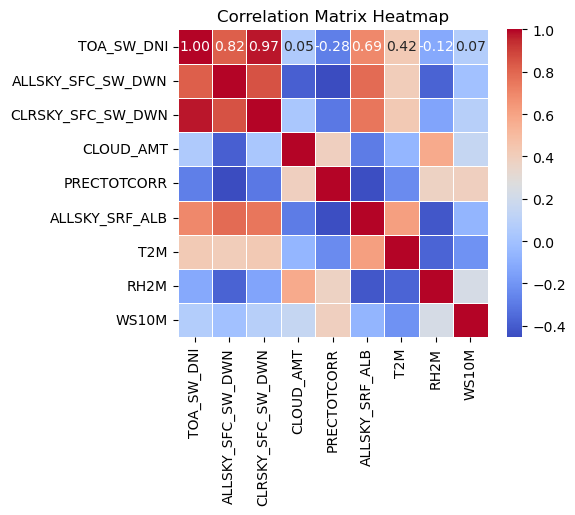

In [40]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Create the heatmap with all rows and columns displayed
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Strong Positive Correlations:
- **Top-Of-Atmosphere Shortwave Direct Normal Radiation (TOA_SW_DNI) and Clear Sky Surface Shortwave Downward Irradiance (CLRSKY_SFC_SW_DWN) (0.972):**
  - These two variables are very strongly correlated, indicating that the direct normal radiation at the top of the atmosphere and the clear-sky surface radiation are closely linked. This makes sense, as clear skies allow more direct solar radiation to reach the surface.
  
- **All Sky Surface Shortwave Downward Irradiance (ALLSKY_SFC_SW_DWN) and All Sky Surface Albedo (ALLSKY_SRF_ALB) (0.785):**
  - There is a strong positive correlation between the total downward irradiance under all sky conditions and surface albedo. High irradiance can lead to higher surface reflectivity.
  
- **All Sky Surface Shortwave Downward Irradiance (ALLSKY_SFC_SW_DWN) and Top-Of-Atmosphere Shortwave Direct Normal Radiation (TOA_SW_DNI) (0.820):**
  - This indicates that the amount of solar energy reaching the surface under all sky conditions is strongly related to the direct normal radiation at the top of the atmosphere.

### Negative Correlations:
- **All Sky Surface Shortwave Downward Irradiance (ALLSKY_SFC_SW_DWN) and Cloud Amount (CLOUD_AMT) (-0.390):**
  - As expected, there is a moderate negative correlation between cloud cover and downward irradiance. More clouds generally reduce the amount of solar energy reaching the surface.
  
- **All Sky Surface Albedo (ALLSKY_SRF_ALB) and Precipitation Corrected Sum (PRECTOTCORR) (-0.447):**
  - There is a moderate negative correlation between surface albedo and precipitation. Wetter surfaces (from precipitation) tend to have lower albedo (less reflective).
  
- **Relative Humidity at 2 Meters (RH2M) and Temperature at 2 Meters (T2M) (-0.373):**
  - Relative humidity is negatively correlated with temperature, which is typical in many climates as higher temperatures often reduce relative humidity.


# 4. Hypothesis : Solar Panel is a good investment for Berkeley Household.

## Cost and Return Rate of installing Solar Panels in Berkeley household
- The average electric rates in Berkeley, CA cost 44 ¢/kilowatt-hour (kWh), so that means that the average electricity customer in Berkeley, CA is using 657 kWh of electricity per month, and 7,884 kWh over the course of the year. Additionally, the cost of installing a solar panel system is approximately $2.68 per watt. (Source: https://www.energysage.com/local-data/electricity-cost/ca/alameda-county/berkeley/#:~:text=That's%2028%25%20higher%20than%20the,the%20course%20of%20the%20year.)
- In Berkeley, solar panels cost about 3 per watt on average.The average solar panel system size in Berkeley is around 3.0 kilowatts, meaning a cost of about $7,314 for a solar installation, or $10,459 before the 0 federal solar tax credit is applied. (Source:https://www.ecowatch.com/solar/panel-cost/ca/berkeley)

In [84]:
average_annual_consumption_kwh = 7884  # kWh per year
solar_panel_efficiency = 0.18 # Typical solar panel efficiency
system_size_kw = 3.0  # Average 3 kW system in Berkeley
installation_cost = 7314  # Total installation cost in USD after federal tax credit is applied
electricity_rate_per_kwh = 0.44  # Cost of electricity per kWh in Berkeley

# Estimate daily solar irradiance and calculate annual energy output
corrected_df['daily_irradiance'] = corrected_df['ALLSKY_SFC_SW_DWN']
annual_solar_irradiance = corrected_df['daily_irradiance'].sum()  # Sum up the daily irradiance to get annual total

# Estimate annual energy output
annual_energy_output = annual_solar_irradiance * solar_panel_efficiency * system_size_kw

# Economic analysis
annual_savings = annual_energy_output * electricity_rate_per_kwh
payback_period = installation_cost / annual_savings
roi = (annual_savings / installation_cost) * 100  # ROI percentage

print(f"Annual Energy Output (kWh): {annual_energy_output:.2f}")
print(f"Annual Savings (USD): ${annual_savings:.2f}")
print(f"Installation Cost (USD): ${installation_cost:.2f}")
print(f"Payback Period (years): {payback_period:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

Annual Energy Output (kWh): 888.37
Annual Savings (USD): $390.88
Installation Cost (USD): $7314.00
Payback Period (years): 18.71
Return on Investment (ROI): 5.34%


Based on the results, the ROI is 5.34%, and it take an average of 18.71 years to save enough money to cover the initial installation expense. That is to say, if you're going to be a long-term resident in Berkeley, it could be a good idea to install solar panels as Berkeley has abundant solar energy resources. However, if you're just attending college here, it's not recommended as your savings can't cover your expense in the short term.

# 6. Key factors contributing to Solar Energy

## Model training and predictions

There're 3 models that are potentially suitable for the dataset, so I'm going to construct one model using each of the methods.

**Linear Regression:**
- **Advantages:** Simple, interpretable, and efficient, making it easy to implement and a good baseline model for understanding relationships between variables.
- **Why Suitable:** Good for building the baseline model.

**Gradient Boosting Regressor:**
- **Advantages:** Builds highly accurate models by sequentially correcting errors, handles complex non-linear relationships, and provides insights into feature importance.
- **Why Suitable:** Ideal for capturing the intricacies of environmental data with potential non-linear relationships.

**Random Forest Regressor:**
- **Advantages:** Combines multiple decision trees for stable and accurate predictions, handles complex non-linear interactions, and is robust against overfitting.
- **Why Suitable:** Effective for environmental data with non-linear interactions and varied data types, offering strong predictive performance.


In [44]:
# Load and import from libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
# Separate the target variable (ALLSKY_SFC_SW_DWN) from the features
X = corrected_df.drop(columns=['ALLSKY_SFC_SW_DWN'])
y = corrected_df['ALLSKY_SFC_SW_DWN']

#### Linear Regression Model

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the Linear Regression model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Results:")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Linear Regression Results:
Mean Absolute Error (MAE): 0.5009954626297777
Mean Squared Error (MSE): 0.3854186305836562
R-squared (R²): 0.8993392737470244


#### Gradient Boosting Regressor Model

In [48]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_mae = mean_absolute_error(y_test, y_gb_pred)
gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_r2 = r2_score(y_test, y_gb_pred)

print("Gradient Boosting Regressor Results:")
print(f'Mean Absolute Error (MAE): {gb_mae}')
print(f'Mean Squared Error (MSE): {gb_mse}')
print(f'R-squared (R²): {gb_r2}')

Gradient Boosting Regressor Results:
Mean Absolute Error (MAE): 0.4921134391558182
Mean Squared Error (MSE): 0.4067083489512857
R-squared (R²): 0.8937789859390334


#### Random Forest Regressor

In [51]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print("\nRandom Forest Regressor Results:")
print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R-squared (R²): {rf_r2}')


Random Forest Regressor Results:
Mean Absolute Error (MAE): 0.4477739130434781
Mean Squared Error (MSE): 0.36471309478260866
R-squared (R²): 0.9047469891655401


By comparing the 3 models above, **Random Forest Regressor** is the best model based on these results.

##### Reasons:
- **Lowest MAE and MSE:** Random Forest has the lowest Mean Absolute Error (0.4478) and Mean Squared Error (0.3647), indicating that, on average, its predictions are closer to the actual values compared to the other models.
- **Highest R²:** With an R² value of 0.9047, Random Forest explains approximately 90.47% of the variance in `ALLSKY_SFC_SW_DWN`(target variable), which is the highest among the three models. A higher R² indicates a better fit to the data.
- **Handling Complexity:** Given the environmental and irradiance data’s likely non-linear relationships and potential interactions between variables, Random Forest’s ability to model such complexities more effectively makes it the most suitable model for this task.


#### Features of Importance

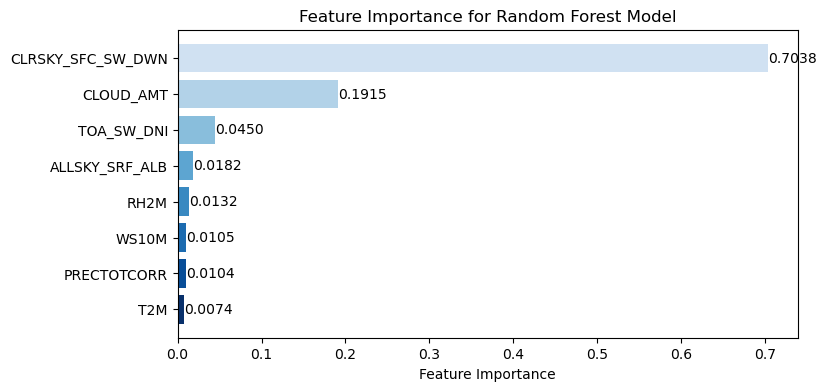

In [64]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Create a color gradient from dark blue to light blue
colors = plt.cm.Blues(np.linspace(0.2, 1, len(importance_df)))

# Plot the feature importance with gradient color and display values on the bars
plt.figure(figsize=(8, 4))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center', ha='left', color='black')

# Invert y-axis, add labels and title
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Model')
plt.show()

 ##### Summary: From the Feature importance plot, we can see that
 **CLRSKY_SFC_SW_DWN (Clear Sky Surface Shortwave Downward Irradiance):** has the highest importance score, around 0.7038. This means it is the most influential feature in predicting the target variable. The model relies heavily on this feature to make accurate predictions.

 **CLOUD_AMT (Cloud Amount):** The second most important feature, with an importance score of 0.1915. This indicates that cloud cover also plays a significant role in the model's predictions, likely because cloud cover directly affects the amount of solar radiation reaching the surface.


# 7. Hypothesis: Solar Energy resources are more abundant in summer months than winter months in Berkeley

Following the seasonal trend plot, we can see the value of irradience related parameters are at the peak in the summer months and are the lowest in winter. But to know whether the null hypothesis is true and statistically significant, ideally we're going to conduct a two sample t test. But we need to check normality of the data first.

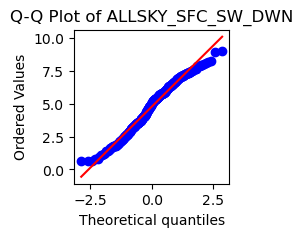

In [91]:
import scipy.stats as stats
# Check Solar Energy Distribution
data = corrected_df['ALLSKY_SFC_SW_DWN']

# Q-Q Plot
plt.figure(figsize=(2, 2))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot of ALLSKY_SFC_SW_DWN')
plt.show()

From Q-Q plot, we can conclude that the distribution is approximately normal, so we can perform a two sample t test to see whether solar energy in summer months are higher than in winter months.

In [94]:
import pandas as pd
from scipy.stats import ttest_ind

# Define summer (June, July, August) and winter (December, January, February) months
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Extract solar irradiance data for summer and winter months
summer_data = corrected_df[corrected_df.index.month.isin(summer_months)]['ALLSKY_SFC_SW_DWN']
winter_data = corrected_df[corrected_df.index.month.isin(winter_months)]['ALLSKY_SFC_SW_DWN']

# Calculate the average solar irradiance for summer and winter
avg_summer_irradiance = summer_data.mean()
avg_winter_irradiance = winter_data.mean()

print(f"Average Summer Solar Irradiance: {avg_summer_irradiance:.2f} W/m^2")
print(f"Average Winter Solar Irradiance: {avg_winter_irradiance:.2f} W/m^2")

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(summer_data, winter_data)

# Print the results of the t-test
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in solar irradiance between summer and winter months.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in solar irradiance between summer and winter months.")

Average Summer Solar Irradiance: 6.37 W/m^2
Average Winter Solar Irradiance: 2.67 W/m^2
T-statistic: 22.38, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in solar irradiance between summer and winter months.


# Discussions and Limitations

- *Is installing solar panels in Berkely a good deal?* Except for the conclusion discussed above, the payback wait time is very long, and we haven't take the future inflation rate into account yet. There're a lot of uncertainties over more than 18 years, and maybe in the future the cost/expense of installing solar panels will decrease too (or we find other types of renewable energy that's more cost effective than solar energy?)

- *The Key Factors?* The high correlation between some variables like TOA_SW_DNI and CLRSKY_SFC_SW_DWN (0.972), and ALLSKY_SRF_ALB and ALLSKY_SFC_SW_DWN (0.785), may lead to redundancy (because they're all about irradience so they are expected to be highly correlated), where the model finds one feature sufficient to capture the necessary information, reducing the importance of the other. Maybe forward and backward selection could also be implemented when building models? Multicollinearity occurs when features are highly correlated, and the model might struggle to tell them apart and could randomly assign more importance to one feature over another, even if both are equally useful.